In [1]:
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import pandas as pd


df = pd.read_csv('election_results_2024.csv')


print(df.head())

print(df.describe())
print(df.dtypes)

       Constituency  Const. No.    Leading Candidate  \
0             AJMER          13  BHAGIRATH CHOUDHARY   
1             ALWAR           8      BHUPENDER YADAV   
2            AMBALA           1       VARUN CHAUDHRY   
3  ANANTNAG-RAJOURI           3     MIAN ALTAF AHMAD   
4         ARAKKONAM           7    S JAGATHRATCHAKAN   

                         Leading Party    Trailing Candidate  \
0               Bharatiya Janata Party  RAMCHANDRA CHOUDHARY   
1               Bharatiya Janata Party           LALIT YADAV   
2             Indian National Congress         BANTO KATARIA   
3  Jammu & Kashmir National Conference        MEHBOOBA MUFTI   
4            Dravida Munnetra Kazhagam             L VIJAYAN   

                             Trailing Party  Margin           Status  
0                  Indian National Congress  329991  Result Declared  
1                  Indian National Congress   48282  Result Declared  
2                    Bharatiya Janata Party   49036  Result Decla

## Leading Party Distribution

/var/folders/rp/_46vfvzd76q_tjb9b2fjpbgh0000gn/T/ipykernel_5472/269404427.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='Leading Party', data=df, order=df['Leading Party'].value_counts().index, palette=palette)
/Applications/miniconda3/lib/python3.11/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Applications/miniconda3/lib/python3.11/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_gr

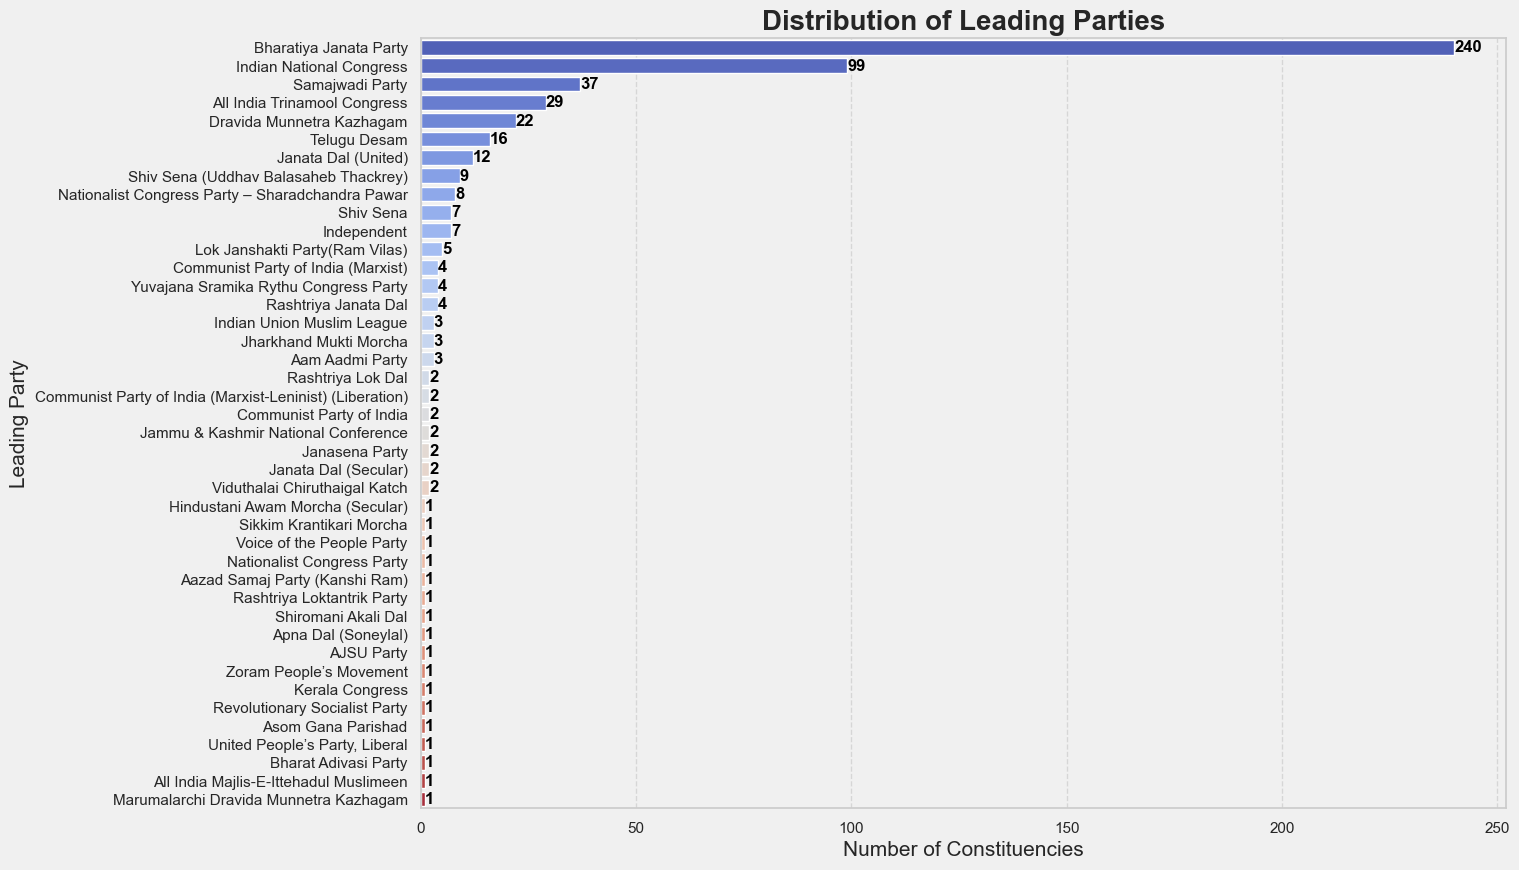

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(14, 10))

palette = sns.color_palette("coolwarm", n_colors=len(df['Leading Party'].unique()))

sns.countplot(y='Leading Party', data=df, order=df['Leading Party'].value_counts().index, palette=palette)

for index, value in enumerate(df['Leading Party'].value_counts()):
    plt.text(value, index, str(value), va='center', ha='left', fontsize=12, color='black', weight='bold')

plt.title('Distribution of Leading Parties', fontsize=20, fontweight='bold')
plt.xlabel('Number of Constituencies', fontsize=15, fontweight='medium')
plt.ylabel('Leading Party', fontsize=15, fontweight='medium')

plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.grid(axis='y', linestyle='')

plt.gca().set_facecolor('#f0f0f0')
plt.gcf().set_facecolor('#f0f0f0')

plt.show()


## Distribution of Constituency Numbers

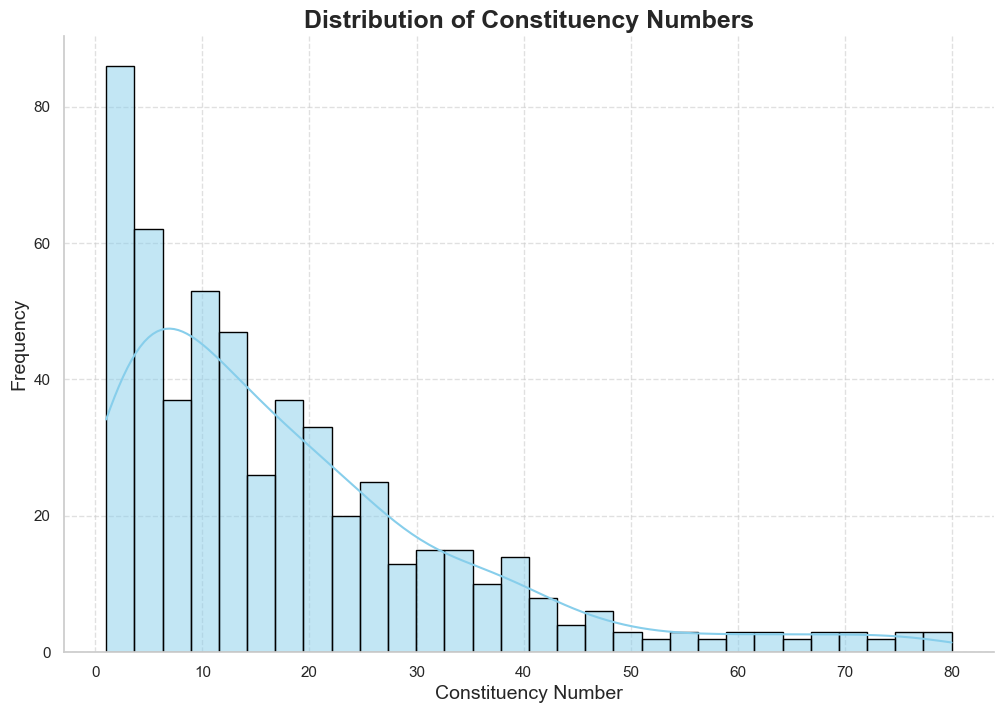

In [10]:
sns.set(style="whitegrid")

# Plotting the distribution of constituency numbers
plt.figure(figsize=(12, 8))

sns.histplot(df['Const. No.'], bins=30, kde=True, color='skyblue', edgecolor='black', linewidth=1)

plt.title('Distribution of Constituency Numbers', fontsize=18, fontweight='bold')
plt.xlabel('Constituency Number', fontsize=14)
plt.ylabel('Frequency', fontsize=14)

plt.grid(True, linestyle='--', alpha=0.6)

sns.despine()

plt.show()


## Margin Districution

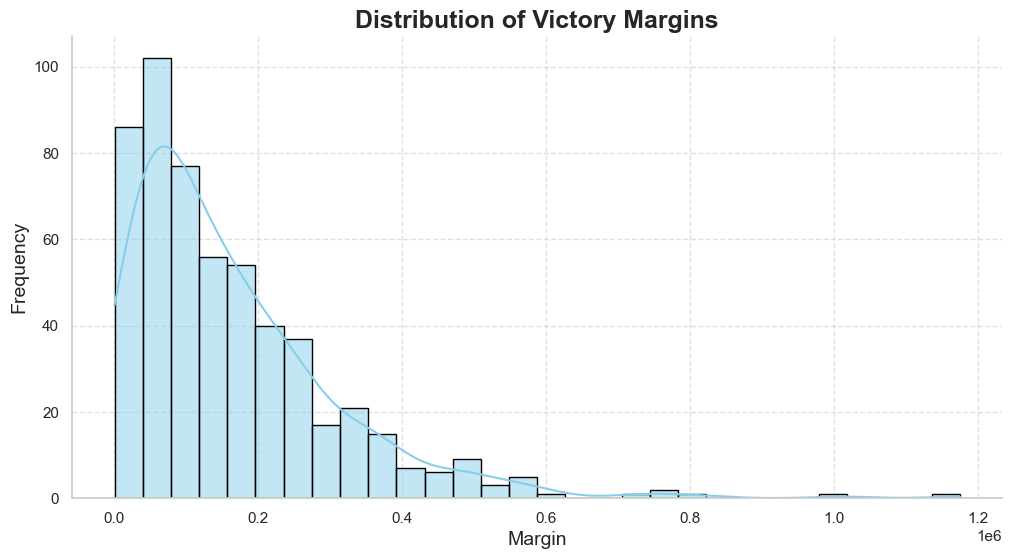

count    5.420000e+02
mean     1.623501e+05
std      1.472628e+05
min      4.800000e+01
25%      5.895675e+04
50%      1.222660e+05
75%      2.229720e+05
max      1.175092e+06
Name: Margin, dtype: float64


In [27]:
df['Margin'] = pd.to_numeric(df['Margin'], errors='coerce')

plt.figure(figsize=(12, 6))
sns.histplot(df['Margin'], bins=30, kde=True, color='skyblue', edgecolor='black', linewidth=1)
plt.title('Distribution of Victory Margins', fontsize=18, fontweight='bold')
plt.xlabel('Margin', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.6)
sns.despine()

plt.show()

print(df['Margin'].describe())

## Top 10 Constituencies with Highest Margins

/var/folders/rp/_46vfvzd76q_tjb9b2fjpbgh0000gn/T/ipykernel_5472/287917613.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Margin', y='Constituency', data=top_10_margins, palette='viridis', edgecolor='black')
/Applications/miniconda3/lib/python3.11/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Applications/miniconda3/lib/python3.11/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd

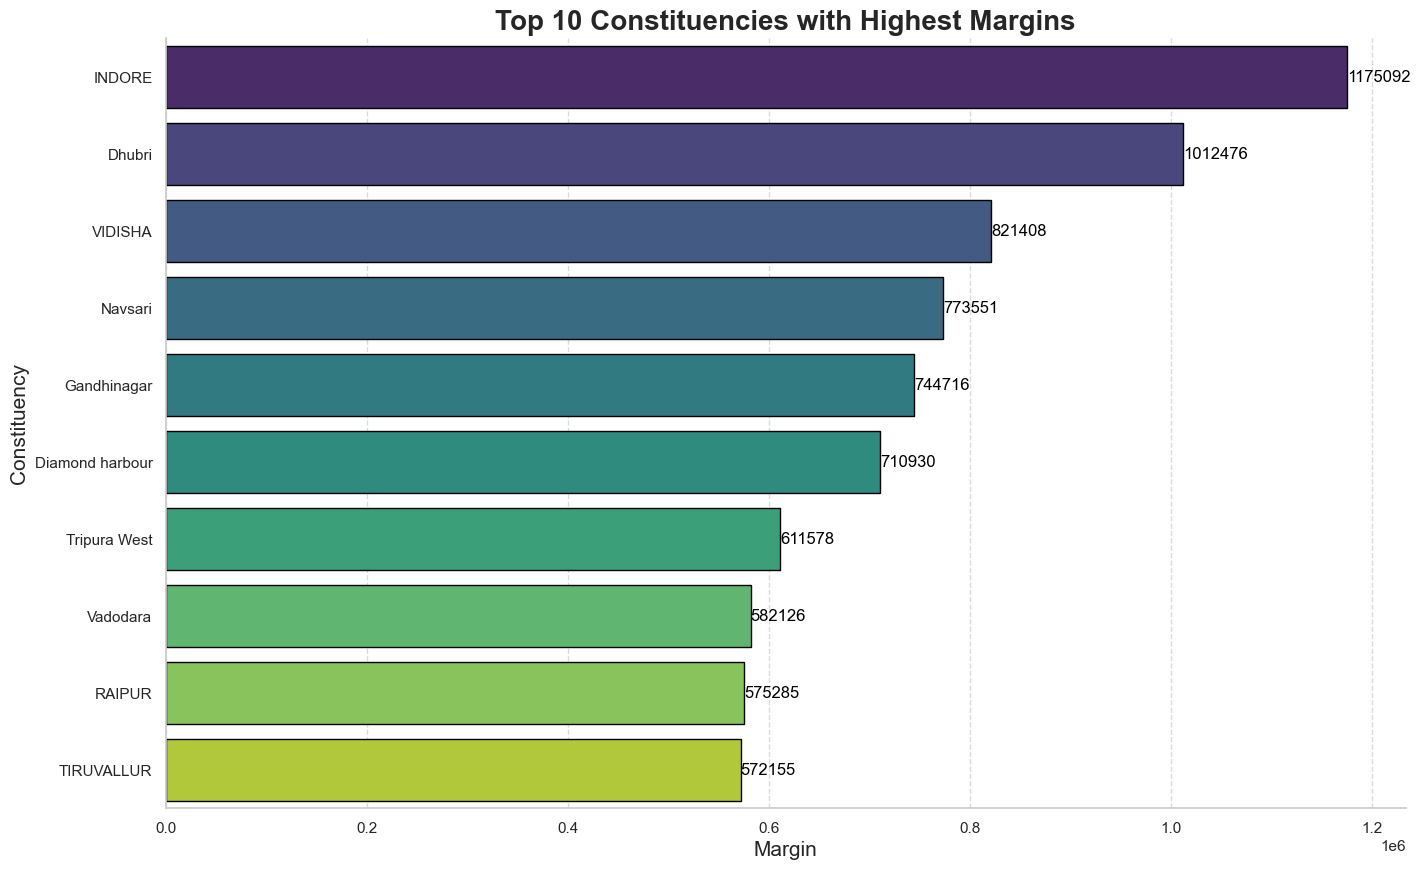

In [28]:
top_10_margins = df.nlargest(10, 'Margin')

# Plotting the top 10 constituencies with the highest margins
plt.figure(figsize=(16, 10))

sns.barplot(x='Margin', y='Constituency', data=top_10_margins, palette='viridis', edgecolor='black')

for index, value in enumerate(top_10_margins['Margin']):
    plt.text(value, index, f'{value:.0f}', va='center', ha='left', fontsize=12, color='black')

plt.title('Top 10 Constituencies with Highest Margins', fontsize=20, fontweight='bold')
plt.xlabel('Margin', fontsize=15)
plt.ylabel('Constituency', fontsize=15)

plt.grid(axis='x', linestyle='--', alpha=0.7)

sns.despine()
plt.show()


## Top 10 Constituencies with lowest margin

/var/folders/rp/_46vfvzd76q_tjb9b2fjpbgh0000gn/T/ipykernel_5472/194480102.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Margin', y='Constituency', data=top_10_lowest_margins, palette='magma')
/Applications/miniconda3/lib/python3.11/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Applications/miniconda3/lib/python3.11/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Applica

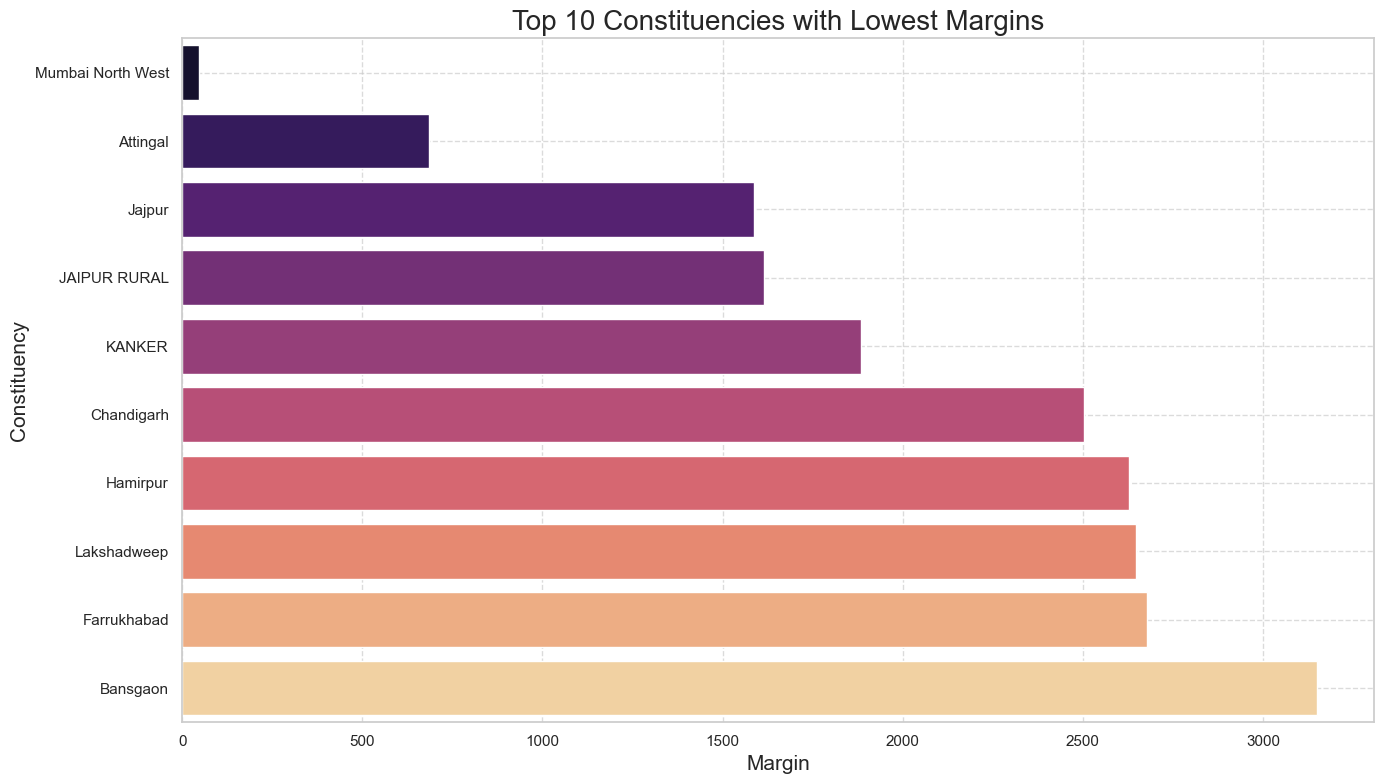

In [17]:
top_10_lowest_margins = df.nsmallest(10, 'Margin')

plt.figure(figsize=(14, 8))
sns.barplot(x='Margin', y='Constituency', data=top_10_lowest_margins, palette='magma')
plt.title('Top 10 Constituencies with Lowest Margins', fontsize=20)
plt.xlabel('Margin', fontsize=15)
plt.ylabel('Constituency', fontsize=15)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


## Comparison of Leading and Trailing Parties

/var/folders/rp/_46vfvzd76q_tjb9b2fjpbgh0000gn/T/ipykernel_5472/675385055.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Difference', y=party_comparison.index, data=party_comparison, palette='coolwarm')
/Applications/miniconda3/lib/python3.11/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Applications/miniconda3/lib/python3.11/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_ke

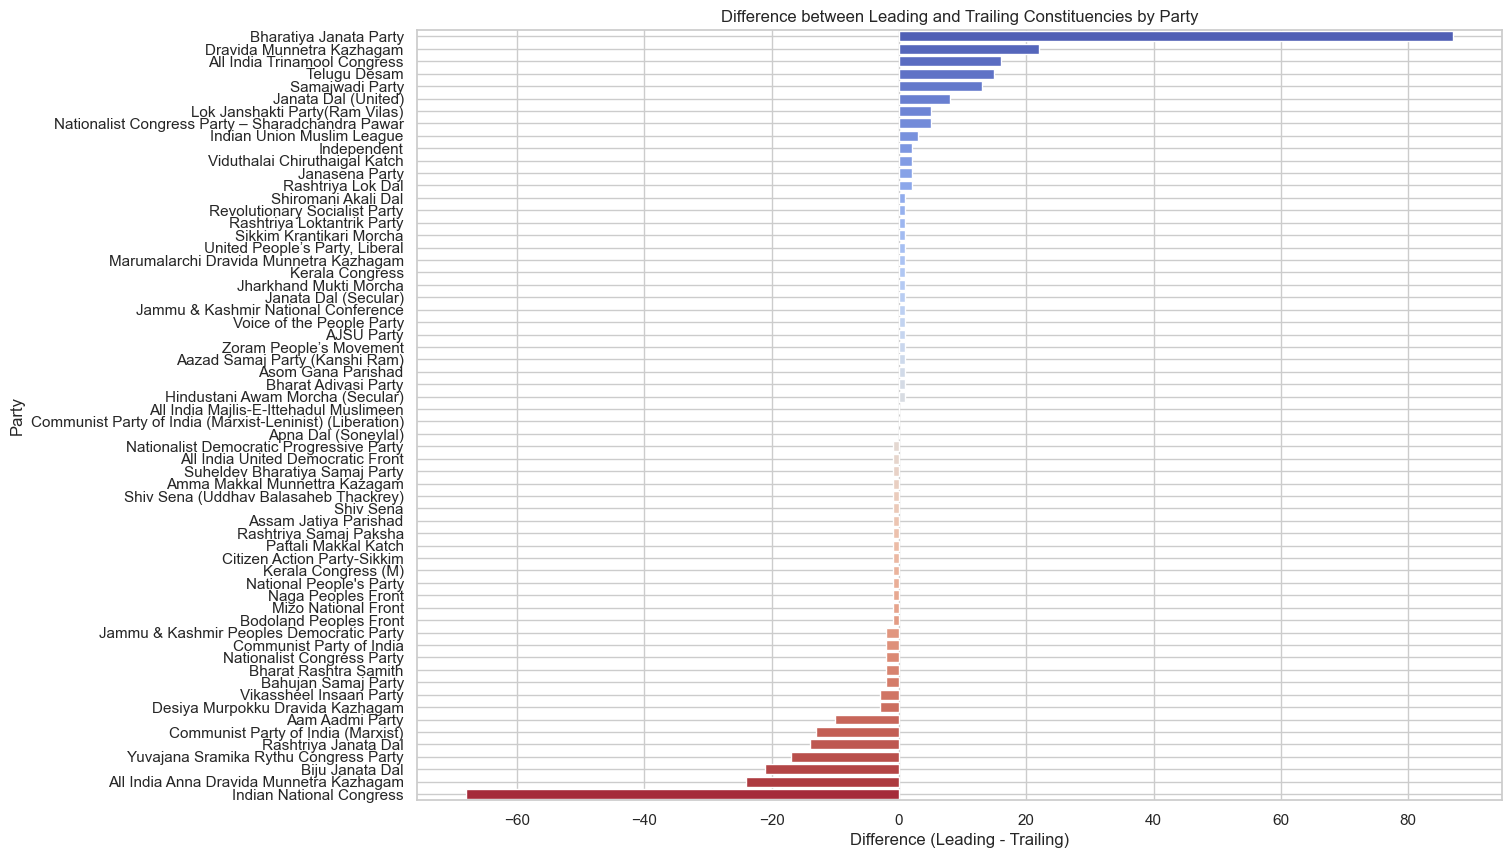

                                                  Leading  Trailing  \
Bharatiya Janata Party                              240.0     153.0   
Dravida Munnetra Kazhagam                            22.0       0.0   
All India Trinamool Congress                         29.0      13.0   
Telugu Desam                                         16.0       1.0   
Samajwadi Party                                      37.0      24.0   
Janata Dal (United)                                  12.0       4.0   
Lok Janshakti Party(Ram Vilas)                        5.0       0.0   
Nationalist Congress Party – Sharadchandra Pawar      8.0       3.0   
Indian Union Muslim League                            3.0       0.0   
Independent                                           7.0       5.0   

                                                  Difference  
Bharatiya Janata Party                                  87.0  
Dravida Munnetra Kazhagam                               22.0  
All India Trinamool Congress 

In [18]:
# Create a dataframe with leading and trailing party counts
leading_counts = df['Leading Party'].value_counts()
trailing_counts = df['Trailing Party'].value_counts()

party_comparison = pd.DataFrame({'Leading': leading_counts, 'Trailing': trailing_counts}).fillna(0)
party_comparison['Difference'] = party_comparison['Leading'] - party_comparison['Trailing']
party_comparison = party_comparison.sort_values('Difference', ascending=False)

plt.figure(figsize=(14, 10))
sns.barplot(x='Difference', y=party_comparison.index, data=party_comparison, palette='coolwarm')
plt.title('Difference between Leading and Trailing Constituencies by Party')
plt.xlabel('Difference (Leading - Trailing)')
plt.ylabel('Party')
plt.grid(True)
plt.show()

print(party_comparison.head(10))

##  Winning Status Distribution

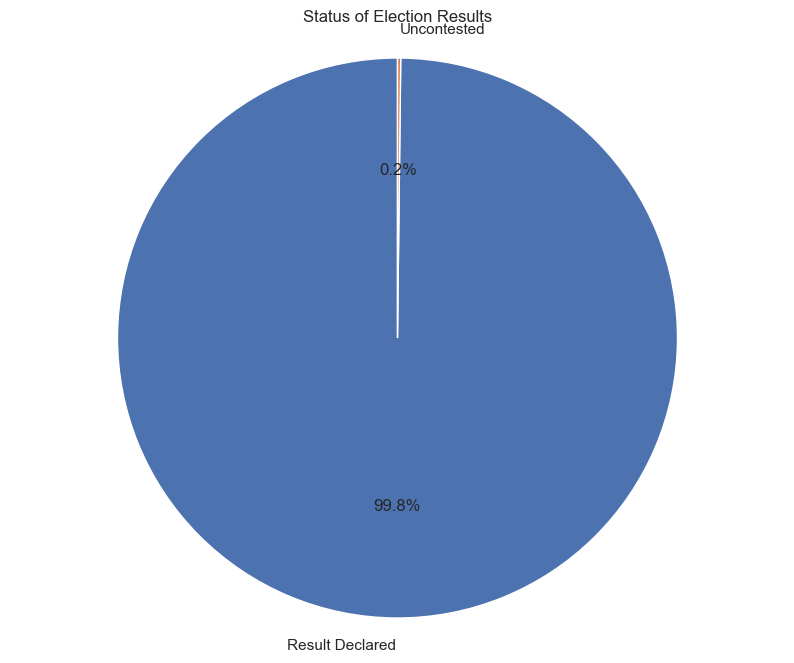

Status
Result Declared    542
Uncontested          1
Name: count, dtype: int64


In [19]:
# Winning status distribution
status_counts = df['Status'].value_counts()

# Create a pie chart
plt.figure(figsize=(10, 8))
plt.pie(status_counts.values, labels=status_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Status of Election Results')
plt.axis('equal')
plt.show()

print(status_counts)

## Number of Seats Won by Each Party

/var/folders/rp/_46vfvzd76q_tjb9b2fjpbgh0000gn/T/ipykernel_5472/3301156402.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=seats_won.values, y=seats_won.index, palette='coolwarm')
/Applications/miniconda3/lib/python3.11/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Applications/miniconda3/lib/python3.11/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Applications/miniconda

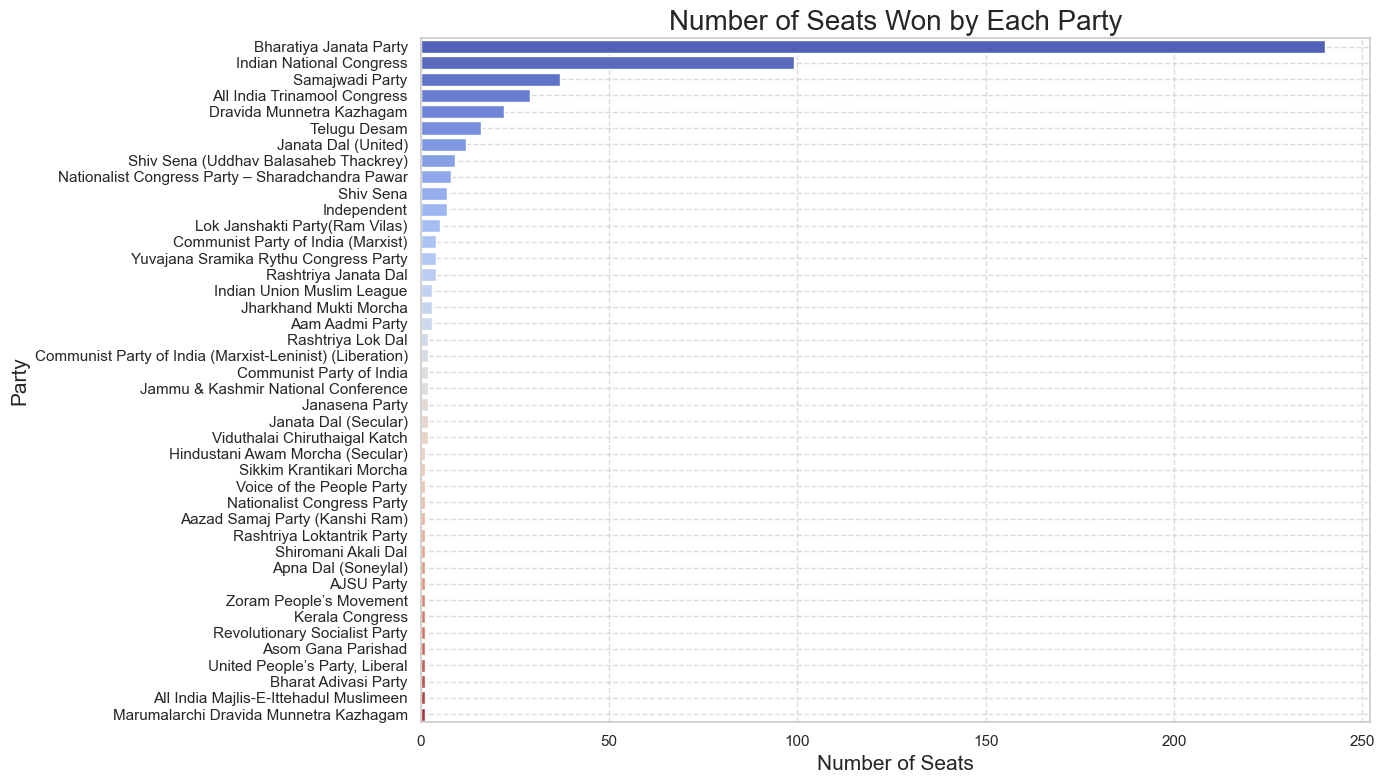

In [20]:
# Number of seats won by each party
seats_won = df['Leading Party'].value_counts()

plt.figure(figsize=(14, 8))
sns.barplot(x=seats_won.values, y=seats_won.index, palette='coolwarm')
plt.title('Number of Seats Won by Each Party', fontsize=20)
plt.xlabel('Number of Seats', fontsize=15)
plt.ylabel('Party', fontsize=15)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


## Top 10 Parties by Number of Seats Won

/var/folders/rp/_46vfvzd76q_tjb9b2fjpbgh0000gn/T/ipykernel_5472/1472145345.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10_seats_won.values, y=top_10_seats_won.index, palette='spring')
/Applications/miniconda3/lib/python3.11/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Applications/miniconda3/lib/python3.11/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Applicatio

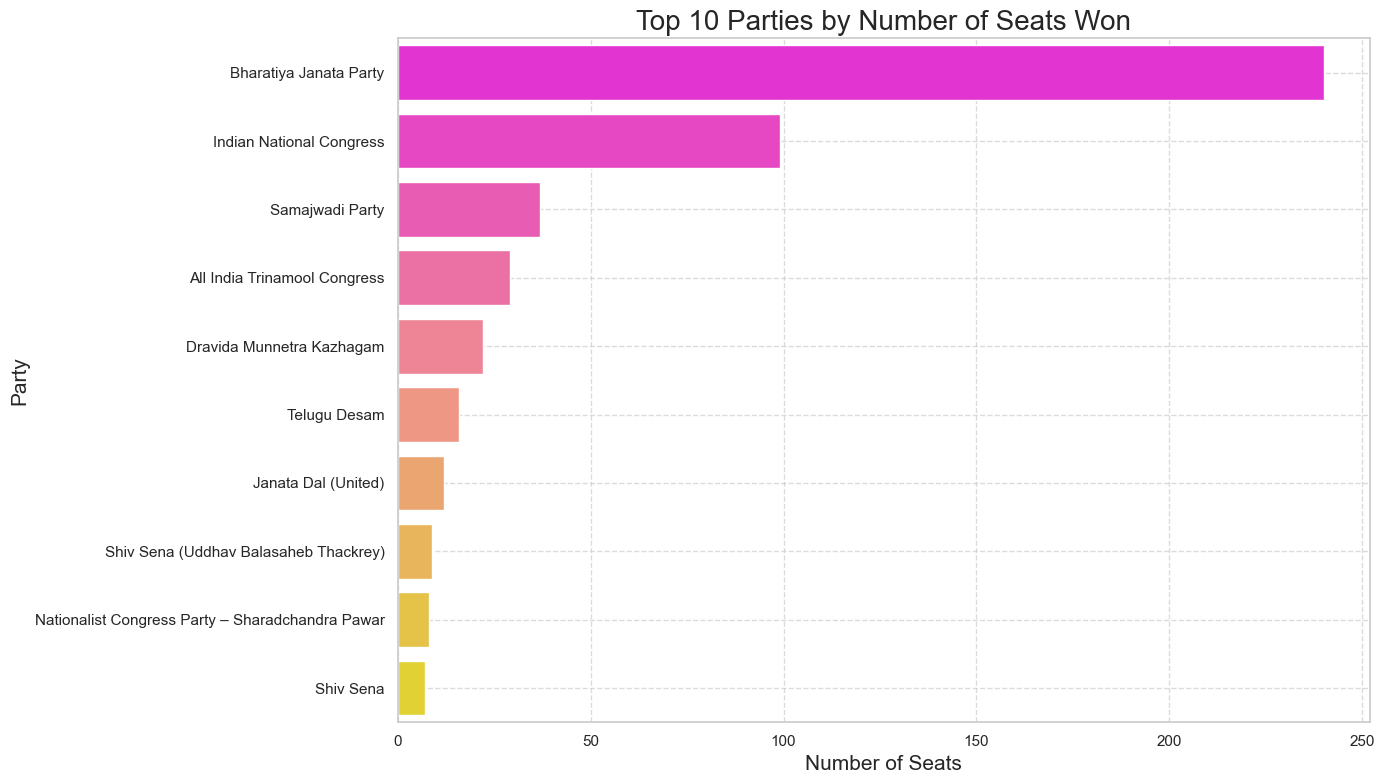

In [21]:
# Top 10 parties by number of seats won
seats_won = df['Leading Party'].value_counts()
top_10_seats_won = seats_won.nlargest(10)

plt.figure(figsize=(14, 8))
sns.barplot(x=top_10_seats_won.values, y=top_10_seats_won.index, palette='spring')
plt.title('Top 10 Parties by Number of Seats Won', fontsize=20)
plt.xlabel('Number of Seats', fontsize=15)
plt.ylabel('Party', fontsize=15)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

## Correlation between Constituency Number and Margin

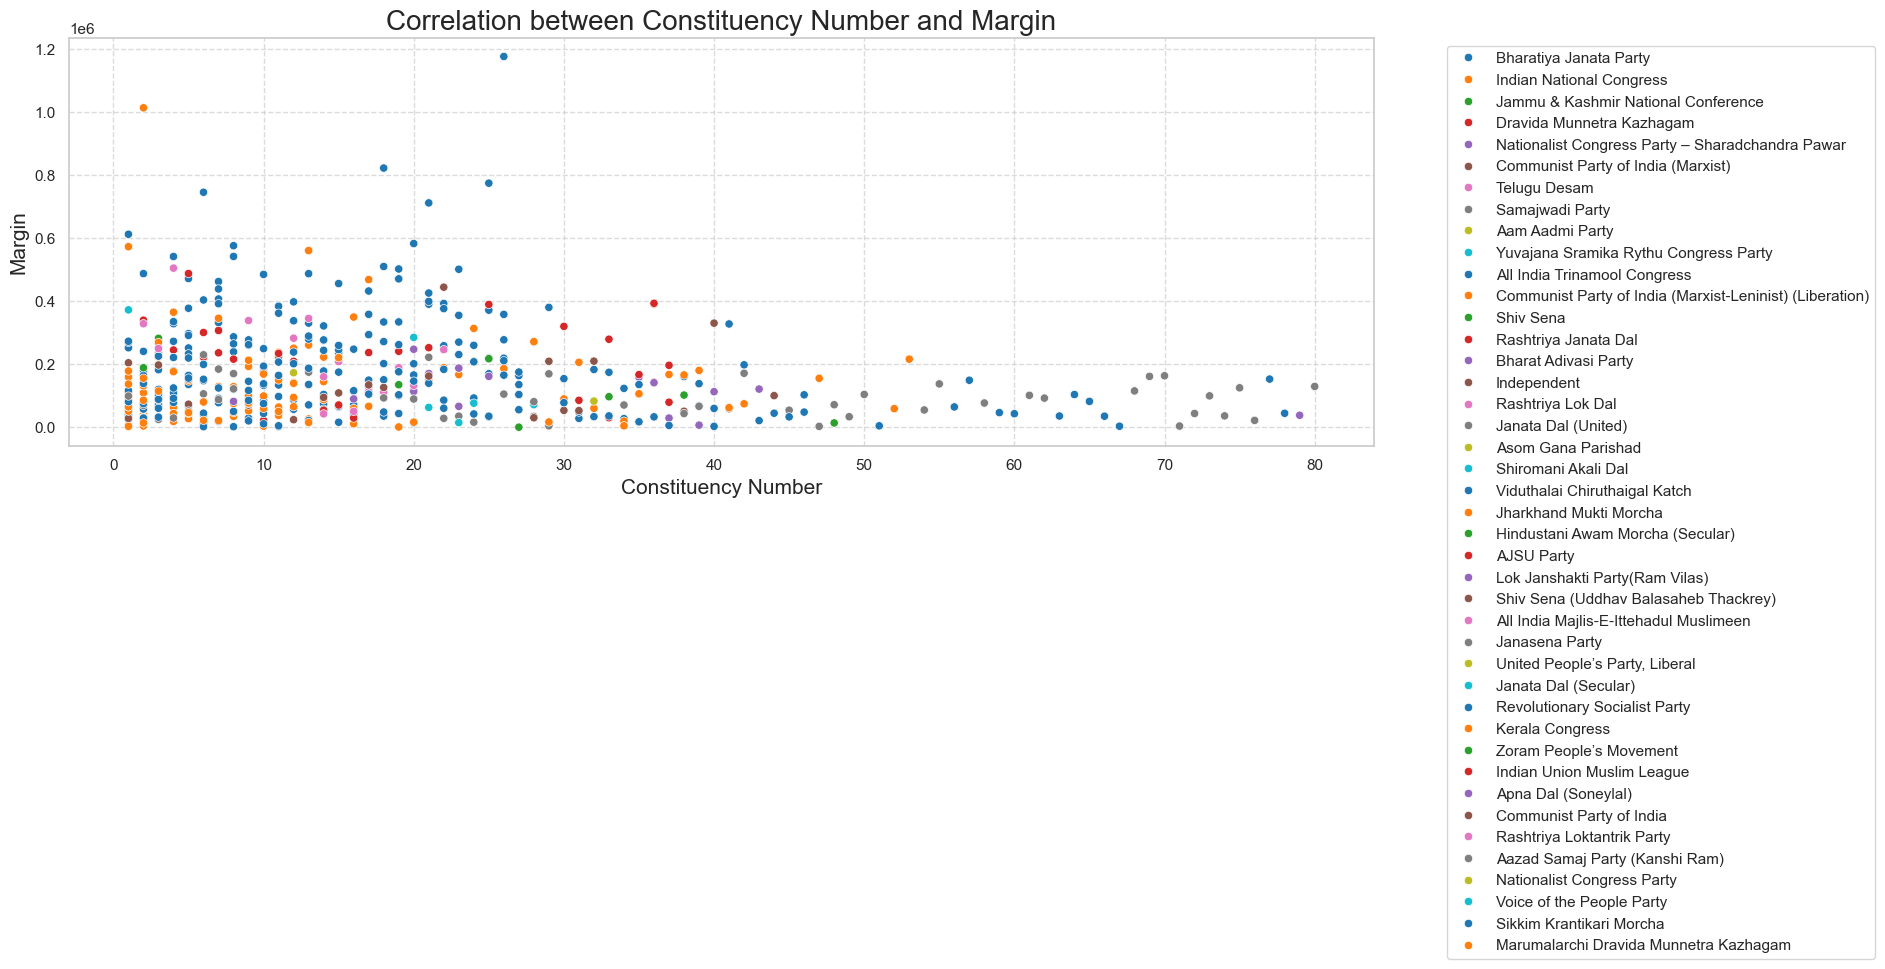

In [23]:
# Plotting the correlation between constituency number and margin
plt.figure(figsize=(14, 8))
sns.scatterplot(x='Const. No.', y='Margin', data=df, hue='Leading Party', palette='tab10')
plt.title('Correlation between Constituency Number and Margin', fontsize=20)
plt.xlabel('Constituency Number', fontsize=15)
plt.ylabel('Margin', fontsize=15)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


## Top Candidates by Margin

/var/folders/rp/_46vfvzd76q_tjb9b2fjpbgh0000gn/T/ipykernel_5472/325758626.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Margin', y='Leading Candidate', data=top_10_candidates, palette='copper')
/Applications/miniconda3/lib/python3.11/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Applications/miniconda3/lib/python3.11/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Appli

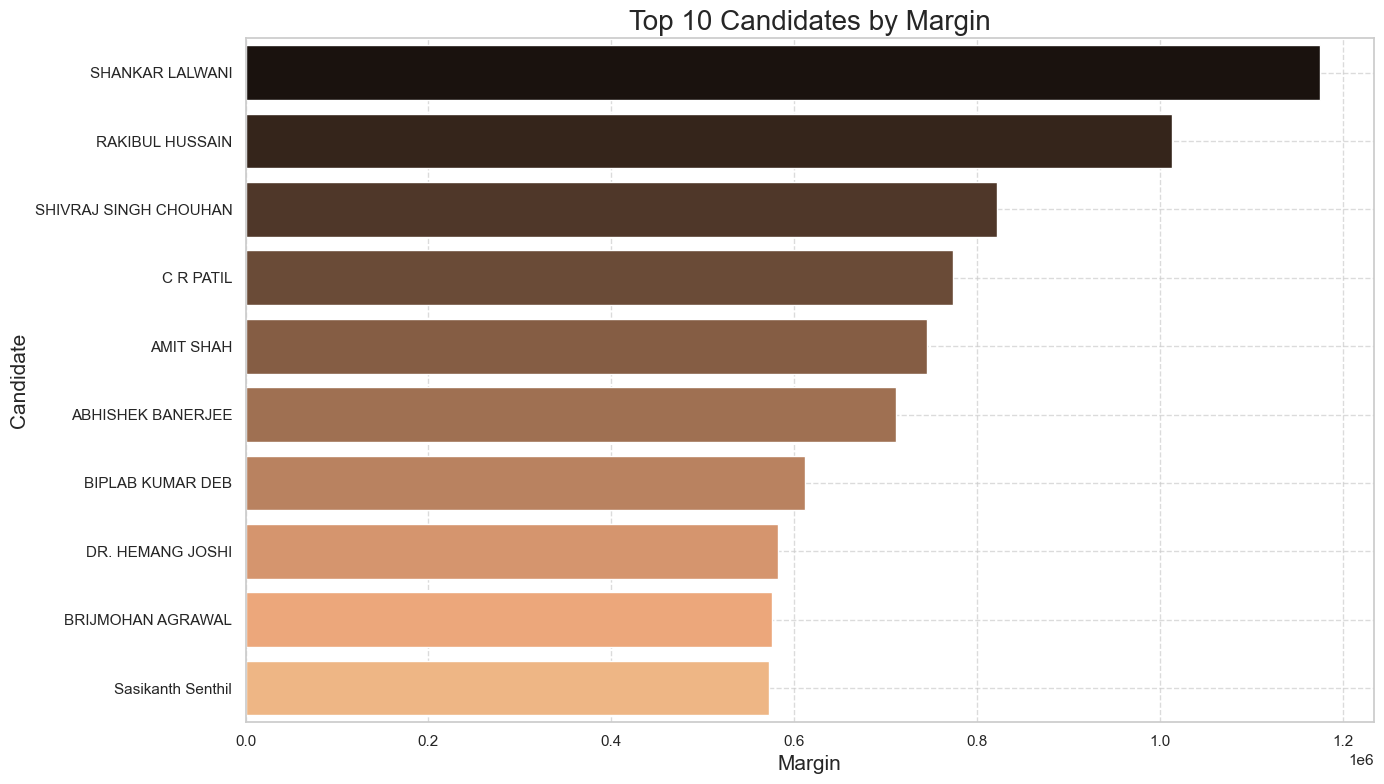

In [25]:
plt.figure(figsize=(14, 8))

# Using a different color palette ('copper') for variety
sns.barplot(x='Margin', y='Leading Candidate', data=top_10_candidates, palette='copper')

plt.title('Top 10 Candidates by Margin', fontsize=20)
plt.xlabel('Margin', fontsize=15)
plt.ylabel('Candidate', fontsize=15)

# Customizing the grid with a dashed line style and slight transparency
plt.grid(True, linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()